In [ ]:
import os
import shutil
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
import numpy as np
import math
from torchsummary import summary
import matplotlib.pyplot as plt
import torch.nn.functional as F
import time
import statistics 
from scipy import stats

In [ ]:
## Splitting Data into Train, Test and Validation:
Train_split=0.6
Test_split=0.2
Validation_split=0.2

In [ ]:
100
60
20
20

In [ ]:
def lstm_data_transform(x_data, y_data, num_steps=15):
    """ Changes data to the format for LSTM training 
for sliding window approach """
    # Prepare the list for the transformed data
    X, y = list(), list()
    # Loop of the entire data set
    for i in range(x_data.shape[0]):
        # compute a new (sliding window) index
        end_ix = i + num_steps
        # if index is larger than the size of the dataset, we stop
        if end_ix >= x_data.shape[0]:
            break
        # Get a sequence of data for x
        seq_X = x_data[i:end_ix]
        # Get only the mean of the sequence labels and rounding the value for label of the sequency
        mean_arr_y= y_data[i:end_ix]

        # Incase you want to find average label
        # y_mean_label=round(np.average(mean_arr_y))
        y_mean_label = stats.mode(mean_arr_y)
        # print(y_mean_label[0][0][0])
        y_label = y_mean_label[0][0][0]
        seq_y = y_label
        # Append the list with sequencies
        X.append(seq_X)
        y.append(seq_y)
    # Make final arrays
    x_array = np.array(X)
    y_array = np.array(y)
    x=torch.from_numpy(x_array)
    y=torch.from_numpy(y_array)
    return x, y

In [ ]:
class PainDataset_Train(Dataset):
    """ Pain dataset."""

    # Initialize your data, download, etc.
    def __init__(self):
        with open('/content/drive/My Drive/LSTM Pain No Pain (Collab)/Data/Pain_features_and_labels_071309_w_21_pain.csv', 'r') as f:
          xy_pain = np.loadtxt(f, delimiter=",",dtype=np.float32,skiprows=1)
        with open('/content/drive/My Drive/LSTM Pain No Pain (Collab)/Data/Pain_features_and_labels_071309_w_21_no_pain.csv', 'r') as f:
          xy_nopain = np.loadtxt(f, delimiter=",",dtype=np.float32,skiprows=1)
        
        x_p=(xy_pain[:(math.floor(Train_split*len(xy_pain))),:-1])/5
        y_p=(xy_pain[:(math.floor(Train_split*len(xy_pain))),[-1]])
        
        # print(y_p.shape)

        # ## Bringing the length of no pain to be of the same length as pain data
        # x_np=(xy_nopain[:len(x_p),:-1])/5
        # y_np=(xy_nopain[:len(x_p),[-1]])
        x_np=(xy_nopain[:(math.floor(Train_split*len(xy_pain))),:-1])/5
        y_np=(xy_nopain[:(math.floor(Train_split*len(xy_pain))),[-1]])

        # print(y_np)

        ## Full length no pain data
        # x_np=(xy_nopain[:(math.floor(Train_split*len(xy_nopain))),:-1])/5
        # y_np=(xy_nopain[:(math.floor(Train_split*len(xy_nopain))),[-1]])
        
        x_combined= np.vstack((x_p,x_np))
        y_combined= np.vstack((y_p,y_np))
        
        x_sequences,y_sequences=lstm_data_transform(x_combined,y_combined)
        
        self.x_data = x_sequences
        self.y_data = y_sequences
        
        self.len = x_sequences.shape[0]
        

    def __getitem__(self, index):
        return self.x_data[index], torch.tensor(self.y_data[index])

    def __len__(self):
        return self.len

In [ ]:
test_dataset = PainDataset_Train()
teest_loader = DataLoader(dataset=test_dataset,batch_size=1,shuffle=False)

Streaming output truncated to the last 5000 lines.
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0

In [ ]:
class PainDataset_Validation(Dataset):
    """ Pain dataset."""

    # Initialize your data, download, etc.
    def __init__(self):
        with open('/content/drive/My Drive/LSTM Pain No Pain (Collab)/Data/Pain_features_and_labels_071309_w_21_pain.csv', 'r') as f:
          xy_pain = np.loadtxt(f, delimiter=",",dtype=np.float32,skiprows=1)
        with open('/content/drive/My Drive/LSTM Pain No Pain (Collab)/Data/Pain_features_and_labels_071309_w_21_no_pain.csv', 'r') as f:
          xy_nopain = np.loadtxt(f, delimiter=",",dtype=np.float32,skiprows=1)
        
        x_p=(xy_pain[(math.floor(Train_split*len(xy_pain))):(math.floor((Train_split+Validation_split)*len(xy_pain))),:-1])/5
        y_p=(xy_pain[(math.floor(Train_split*len(xy_pain))):(math.floor((Train_split+Validation_split)*len(xy_pain))),[-1]])
        
        # print(y_p.shape)

        # ## Bringing the length of no pain to be of the same length as pain data        
        x_np=(xy_nopain[(math.floor(Train_split*len(xy_pain))):(math.floor((Train_split+Validation_split)*len(xy_pain))),:-1])/5
        y_np=(xy_nopain[(math.floor(Train_split*len(xy_pain))):(math.floor((Train_split+Validation_split)*len(xy_pain))),[-1]])

        # print(y_np.shape)


        ## Full length no pain data
        # x_np=(xy_nopain[-(math.floor(Test_split*len(xy_nopain))):,:-1])/5
        # y_np=(xy_nopain[-(math.floor(Test_split*len(xy_nopain))):,[-1]])
        
        x_combined= np.vstack((x_p,x_np))
        y_combined= np.vstack((y_p,y_np))
        
        x_sequences,y_sequences=lstm_data_transform(x_combined,y_combined)
        
        self.x_data = x_sequences
        self.y_data = y_sequences
        
        self.len = x_sequences.shape[0]
        

    def __getitem__(self, index):
        return self.x_data[index], torch.tensor(self.y_data[index])

    def __len__(self):
        return self.len

In [ ]:
# test_dataset = PainDataset_Validation()
# teest_loader = DataLoader(dataset=test_dataset,batch_size=1,shuffle=False)

In [ ]:
class PainDataset_Test(Dataset):
    """ Pain dataset."""

    # Initialize your data, download, etc.
    def __init__(self):
        with open('/content/drive/My Drive/LSTM Pain No Pain (Collab)/Data/Pain_features_and_labels_071309_w_21_pain.csv', 'r') as f:
          xy_pain = np.loadtxt(f, delimiter=",",dtype=np.float32,skiprows=1)
        with open('/content/drive/My Drive/LSTM Pain No Pain (Collab)/Data/Pain_features_and_labels_071309_w_21_no_pain.csv', 'r') as f:
          xy_nopain = np.loadtxt(f, delimiter=",",dtype=np.float32,skiprows=1)
        
        x_p=(xy_pain[-(math.floor(Test_split*len(xy_pain))):,:-1])/5
        y_p=(xy_pain[-(math.floor(Test_split*len(xy_pain))):,[-1]])
        
        # print(y_p.shape)

        # ## Bringing the length of no pain to be of the same length as pain data        
        x_np=(xy_nopain[(math.floor((Train_split+Validation_split)*len(xy_pain))):len(xy_pain)-1,:-1])/5
        y_np=(xy_nopain[(math.floor((Train_split+Validation_split)*len(xy_pain))):len(xy_pain)-1,[-1]])

        # print(y_np.shape)

        ## Full length no pain data
        # x_np=(xy_nopain[-(math.floor(Test_split*len(xy_nopain))):,:-1])/5
        # y_np=(xy_nopain[-(math.floor(Test_split*len(xy_nopain))):,[-1]])
        
        x_combined= np.vstack((x_p,x_np))
        y_combined= np.vstack((y_p,y_np))
        
        x_sequences,y_sequences=lstm_data_transform(x_combined,y_combined)
        
        self.x_data = x_sequences
        self.y_data = y_sequences
        
        self.len = x_sequences.shape[0]
        

    def __getitem__(self, index):
        return self.x_data[index], torch.tensor(self.y_data[index])

    def __len__(self):
        return self.len

In [ ]:
test_dataset = PainDataset_Validation()
print(len(test_dataset))
# teest_loader = DataLoader(dataset=test_dataset,batch_size=1,shuffle=False)

3185


In [ ]:
print("Train_split: ",Train_split*100,"% Test_split :",Test_split*100,"% Validation_split :",Validation_split*100,"% ")

Train_split:  60.0 % Test_split : 20.0 % Validation_split : 20.0 % 


In [ ]:
start = time.time()

device = torch.device('cuda')

# Hyper-parameters 
# input_size = 18 AU (Both presence(1) and intensities(17) )
num_classes = 2 ## (Binary classification as pain(1) or no pain(0) )
num_epochs = 100
batch_size = 30
learning_rate = 0.00001

input_size = 18
sequence_length = 15
hidden_size = 50
num_layers = 2


## PAIN DATASET

## Add dataset here

train_dataset = PainDataset_Train()
train_loader = DataLoader(dataset=train_dataset,batch_size=30,shuffle=True)

# Fully connected neural network with one hidden layer
class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(RNN, self).__init__()
        self.num_layers = num_layers
        self.hidden_size = hidden_size
        # self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        # -> x needs to be: (batch_size, seq, input_size)
        
        # or:
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        # Can add sigmoid here itself ################################################## 
        self.fc = nn.Linear(hidden_size, num_classes)
        
    def forward(self, x):
        # Set initial hidden states (and cell states for LSTM)
        h0 = torch.ones(self.num_layers, x.size(0), self.hidden_size).to(device) 
        c0 = torch.ones(self.num_layers, x.size(0), self.hidden_size).to(device) 
        
        # Check list sizes here to match required lengths
        # x: (n, 28, 28), h0: (2, n, 128)
        
        # Forward propagate RNN
        out, _ = self.lstm(x, (h0,c0))  
        
        # out: tensor of shape (batch_size, seq_length, hidden_size)
        # out: (n, 28, 128)
        
        # Decode the hidden state of the last time step
        out = out[:, -1, :]
        # out: (n, 128)
#         F.log_softmax(self.linear(bow_vec), dim=1)
        out = self.fc(out)
        out= F.log_softmax((out),dim=1)
        # out: (n, 2)
        return out

model = RNN(input_size, hidden_size, num_layers, num_classes).to(device)

# Loss and optimizer setting
# criterion = nn.CrossEntropyLoss() ## Useful for later stage where we might have to use pain levels
criterion = nn.NLLLoss()
# criterion = nn.BCELoss()
# criterion = nn.BCEWithLogitsLoss()
m = nn.Sigmoid()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)  
## Hinge loss try

In [ ]:
# zz=next(iter(train_loader))
# zz[0].shape

In [ ]:
# summary(model,input_size=(10,30,18))
print(model)

RNN(
  (lstm): LSTM(18, 50, num_layers=2, batch_first=True)
  (fc): Linear(in_features=50, out_features=2, bias=True)
)


In [ ]:
n_total_steps = len(train_loader)
i=0

loss_count=[]
Valid_count=[]

for epoch in range(num_epochs):
    loss_value=0.0
    valid_loss_value=0.0
    for i,data in enumerate(train_loader, 0):
#         print(data)
        features, labels = data
        # print('labels',labels)
#         print('features',features)
        
        features = features.reshape(-1, sequence_length, input_size).to(device)
#         print(features.shape)
        labels = labels.to(device)
        # Forward pass
        outputs = model(features)
#         print(len(labels),len(m(outputs)[0]))
#         print("sh",features.shape)
#         print('out',outputs.shape)
#         print('lab',labels.shape)
        loss = criterion(outputs, labels.long())
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        i+=1
        loss_value+=loss.item()
        if (i+1) % 100 == 0:
            print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.6f}')
    loss_count.append(loss_value/n_total_steps)
    ## Add validation code here (End of an epoch)

    Val_dataset = PainDataset_Validation()
    Val_loader = DataLoader(dataset=Val_dataset,batch_size=30,shuffle=False)
    # Test the model on Validation data
    # In test phase, we don't need to compute gradients (for memory efficiency)
    n_total_steps_v = len(Val_loader)
    with torch.no_grad():
        n_correct_v = 0
        n_samples_v = 0
        valid_loss_value=0.0
        for i,data_v in enumerate(Val_loader, 0):
            # print(data)
            features_v, labels_v = data_v
            features_v = features_v.reshape(-1, sequence_length, input_size).to(device)
            labels_v=labels_v.to(device)
            
            outputs_v = model(features_v)
            # print(outputs)
            _, predicted_v = torch.max(outputs_v.data, 1)
            valid_loss = criterion(outputs_v, labels_v.long())
            valid_loss_value+=valid_loss.item()
            # print('predicted',predicted)
            # print('labels',labels)
            n_samples_v += labels_v.size(0)
            n_correct_v += (predicted_v == labels_v.long()).sum().item()
        # append avg val loss 
        Valid_count.append(valid_loss_value/n_total_steps_v)
        acc_val = 100.0 * n_correct_v / n_samples_v
        print(f'Accuracy of the network on Validation data for epoch {epoch+1} is : {acc_val} %')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


Epoch [1/100], Step [100/320], Loss: 0.718011
Epoch [1/100], Step [200/320], Loss: 0.662203
Epoch [1/100], Step [300/320], Loss: 0.719922


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:39: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


Accuracy of the network on Validation data for epoch 1 is : 50.01569858712716 %
Epoch [2/100], Step [100/320], Loss: 0.665662
Epoch [2/100], Step [200/320], Loss: 0.703094
Epoch [2/100], Step [300/320], Loss: 0.701485
Accuracy of the network on Validation data for epoch 2 is : 50.01569858712716 %
Epoch [3/100], Step [100/320], Loss: 0.690911
Epoch [3/100], Step [200/320], Loss: 0.704416
Epoch [3/100], Step [300/320], Loss: 0.703013
Accuracy of the network on Validation data for epoch 3 is : 50.01569858712716 %
Epoch [4/100], Step [100/320], Loss: 0.696971
Epoch [4/100], Step [200/320], Loss: 0.696656
Epoch [4/100], Step [300/320], Loss: 0.704681
Accuracy of the network on Validation data for epoch 4 is : 50.01569858712716 %
Epoch [5/100], Step [100/320], Loss: 0.688266
Epoch [5/100], Step [200/320], Loss: 0.700362
Epoch [5/100], Step [300/320], Loss: 0.695977
Accuracy of the network on Validation data for epoch 5 is : 50.01569858712716 %
Epoch [6/100], Step [100/320], Loss: 0.692506
Ep

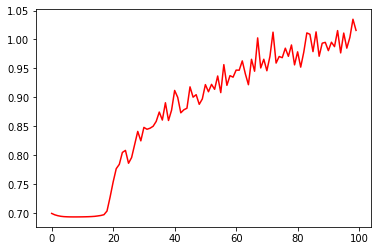

In [ ]:
plt.plot(Valid_count,"r")
# plt.savefig(r'/content/drive/My Drive/LSTM Pain No Pain (Collab)/LSTM_Valid_loss_'+str(num_epochs)+'_epochs.png')

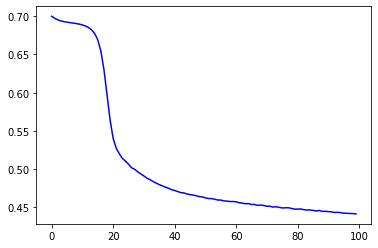

In [ ]:
plt.plot(loss_count,"b")
# plt.savefig(r'/content/drive/My Drive/LSTM Pain No Pain (Collab)/LSTM_Train_loss_'+str(num_epochs)+'_epochs.png')

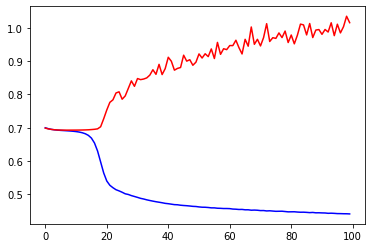

In [ ]:
plt.plot(loss_count,"b")
plt.plot(Valid_count,"r")
# plt.savefig(r'/content/drive/My Drive/LSTM Pain No Pain (Collab)/LSTM_Train_Valid_loss_'+str(num_epochs)+'_epochs.png')

In [ ]:
## Testing the model for both labels

model.eval()

test_dataset = PainDataset_Test()
test_loader = DataLoader(dataset=test_dataset,batch_size=1,shuffle=False)

# Test the model
# In test phase, we don't need to compute gradients (for memory efficiency)
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for i,data in enumerate(test_loader, 0):
        # print(data)
        features, labels = data
        features = features.reshape(-1, sequence_length, input_size).to(device)
        labels=labels.to(device)
        
        outputs = model(features)
        # print(outputs)
        _, predicted = torch.max(outputs.data, 1)
        # print('predicted',predicted)
        # print('labels',labels)
        n_samples += labels.size(0)
        n_correct += (predicted == labels.long()).sum().item()

    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network on test data: {acc} %')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:38: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


Accuracy of the network on test data: 49.92150706436421 %


In [ ]:
## Testing the model for both labels

model.eval()

test_dataset = PainDataset_Train()
test_loader = DataLoader(dataset=test_dataset,batch_size=1,shuffle=False)

# Test the model
# In test phase, we don't need to compute gradients (for memory efficiency)
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for i,data in enumerate(test_loader, 0):
        # print(data)
        features, labels = data
        features = features.reshape(-1, sequence_length, input_size).to(device)
        labels=labels.to(device)
        
        outputs = model(features)
        # print(outputs)
        _, predicted = torch.max(outputs.data, 1)
        # print('predicted',predicted)
        # print('labels',labels)
        n_samples += labels.size(0)
        n_correct += (predicted == labels.long()).sum().item()

    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network on test data: {acc} %')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


Accuracy of the network on test data: 78.36202399582682 %


In [ ]:
# PATH =r'/content/drive/My Drive/LSTM Pain No Pain (Collab)/Saved_Models/pain_model_100epochs.pth'
# torch.save(model.state_dict(), PATH)

In [ ]:
end = time.time()
print('Time taken: ',end - start)

Time taken:  256.29805994033813
